TP - 04: Apply the GRR mechanism to the attached dataset (FIMU_2017_Vhs.csv).
Select one attribute among [Gender, Age, Geolife, Visitor Category, Region, Sleeping Area] (distribute between students)
Vary parameter **ε in [0.1, 1, 10]** For each experiment:

**Evaluate the RMSE between the real frequency and estimated one. What are the values for p and q.**

**Submitted By:**
**Sheikh Shah Mohammad Motiur RAHMAN**

# Import Libraries

In [104]:
import pandas as pd
pd.set_option('mode.chained_assignment',None)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import copy
from scipy.stats import bernoulli
import csv
import random

# Read Dataset

In [105]:
df = pd.read_csv('FIMU_2017_Vhs.csv')
del df['Person ID']
del df['Name']
df.sample(5)

,Gender,Age,Geolife,Visitor category,Region,Sleeping area
6342,M,<18,popular,Resident,Franche-Comté,City of Belfort
7656,M,35-44,middle-class urban,Resident,Franche-Comté,City of Belfort
16703,F,55-64,dynamic rural,Resident,Franche-Comté,NR
39209,F,55-64,popular,Resident,Franche-Comté,City of Belfort
58937,M,>65,rural worker,French tourist,Franche-Comté,Rest of Haute Saone


# Explore Dataset

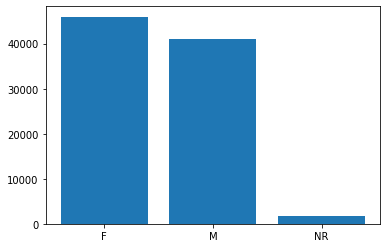

Gender nb of values j = 3


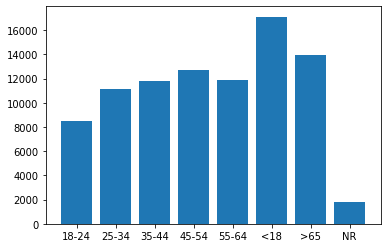

Age nb of values j = 8


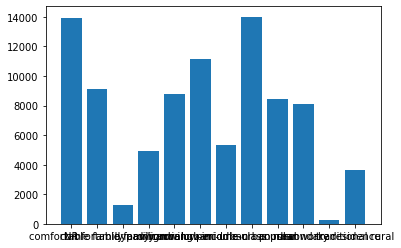

Geolife nb of values j = 12


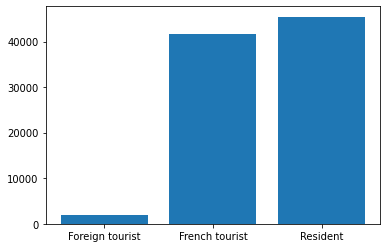

Visitor category nb of values j = 3


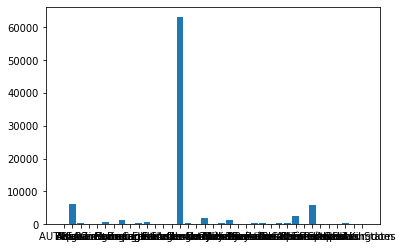

Region nb of values j = 37


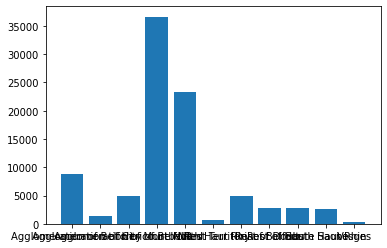

Sleeping area nb of values j = 11


In [106]:
for col in df.columns:
    nb_col = np.unique(df[col],return_counts=True)
    plt.bar(range(len(nb_col[0])),nb_col[-1])
    plt.xticks(range(len(nb_col[0])),nb_col[0])
    plt.show()
    print(col,'nb of values j =',len(nb_col[0]))

# Anonymizing data with GRR

In [129]:
dfnew = copy.deepcopy(df['Age'])

Real = np.unique(dfnew,return_counts=1)
Real

(array(['18-24', '25-34', '35-44', '45-54', '55-64', '<18', '>65', 'NR'],
       dtype=object),
 array([ 8474, 11115, 11813, 12710, 11907, 17111, 13968,  1837]))

# Preprocessing: Any special encoding

In [130]:
V = range(len(Real[0]))

dfnew.replace(Real[0],V,inplace=True)
dfnew.sample(5)

6342     5
7656     2
16703    4
39209    4
58937    6
Name: Age, dtype: int64

# GRR mechanism

In [131]:
def GRR(arr,V, p,q):
  coin = random.random()
  if coin <= p:
    return arr
  else:
    return random.choice([ele for ele in V if ele != arr])

# Anonymizing with esp = 0.1

In [132]:
seed=42

np.random.seed(seed)

j = len(V)

eps = 0.1

p=np.exp(eps)/(np.exp(eps)+j-1)

q=(1-p)/(j-1)

lst_anon = []

count =0
for arr in dfnew:
    arr_anon = GRR(arr,V, p,q)
    lst_anon.append(arr_anon)
    
    if count == 10:
        print('Original:\t',arr)
        print('Anonymized:\t',arr_anon)
    count+=1

Original:	 7
Anonymized:	 1


# Anonymizing with esp = 1

In [133]:
seed=42

np.random.seed(seed)

j1 = len(V)

eps1 = 1

p1=np.exp(eps1)/(np.exp(eps1)+j1-1)

q1=(1-p1)/(j1-1)

lst_anon1 = []

count =0
for arr in dfnew:
    arr_anon = GRR(arr,V, p1,q1)
    lst_anon1.append(arr_anon)
    
    if count == 10:
        print('Original:\t',arr)
        print('Anonymized:\t',arr_anon)
    count+=1

Original:	 7
Anonymized:	 5


# Anonymizing with esp = 10

In [134]:
seed=42

np.random.seed(seed)

j10 = len(V)

eps10 = 10

p10=np.exp(eps10)/(np.exp(eps10)+j10-1)

q10=(1-p10)/(j10-1)

lst_anon10 = []

count =0
for arr in dfnew:
    arr_anon = GRR(arr,V, p10,q10)
    lst_anon10.append(arr_anon)
    
    if count == 10:
        print('Original:\t',arr)
        print('Anonymized:\t',arr_anon)
    count+=1

Original:	 7
Anonymized:	 7


# Ni be the number of times the value vi (esp = 0.1)

In [135]:
Ni = np.unique(lst_anon,return_counts=1)
for val in range(len(Ni[0])):
    print(val,Ni[-1][val])

0 11039
1 11121
2 11129
3 11250
4 11160
5 11290
6 11030
7 10916


# Ni be the number of times the value vi (esp = 1)

In [136]:
Ni1 = np.unique(lst_anon1,return_counts=1)
for val in range(len(Ni1[0])):
    print(val,Ni1[-1][val])

0 10437
1 11196
2 11290
3 11302
4 11316
5 12221
6 11604
7 9569


# Ni be the number of times the value vi (esp = 10)

In [137]:
Ni10 = np.unique(lst_anon10,return_counts=1)
for val in range(len(Ni10[0])):
    print(val,Ni10[-1][val])

0 8474
1 11112
2 11812
3 12710
4 11908
5 17111
6 13969
7 1839


# Visualization real vs Ni (esp = 0.1)

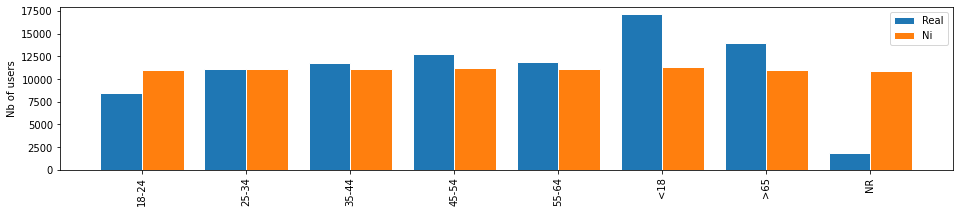

In [138]:
barWidth = 0.4
r1 = np.arange(len(Real[-1]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16,3))
plt.bar(r1, Real[-1], color='tab:blue', width=barWidth, edgecolor='white', label='Real')
plt.bar(r2, Ni[-1], color='tab:orange', width=barWidth, edgecolor='white', label='Ni')
plt.xticks([r+barWidth/2 for r in r1], Real[0],rotation=90)
plt.ylabel('Nb of users')
plt.legend()
plt.show();

# Visualization real vs Ni (esp = 1)

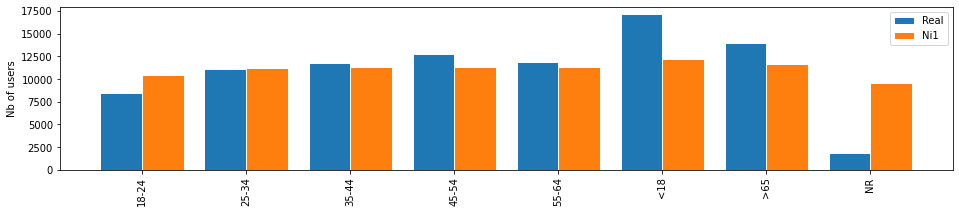

In [139]:
barWidth = 0.4
r1 = np.arange(len(Real[-1]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16,3))
plt.bar(r1, Real[-1], color='tab:blue', width=barWidth, edgecolor='white', label='Real')
plt.bar(r2, Ni1[-1], color='tab:orange', width=barWidth, edgecolor='white', label='Ni1')
plt.xticks([r+barWidth/2 for r in r1], Real[0],rotation=90)
plt.ylabel('Nb of users')
plt.legend()
plt.show();

# Visualization real vs Ni (esp = 10)

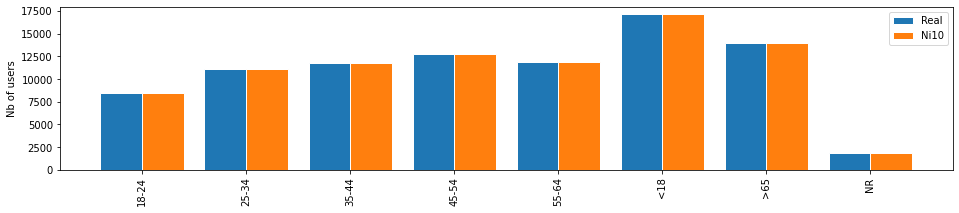

In [140]:
barWidth = 0.4
r1 = np.arange(len(Real[-1]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16,3))
plt.bar(r1, Real[-1], color='tab:blue', width=barWidth, edgecolor='white', label='Real')
plt.bar(r2, Ni10[-1], color='tab:orange', width=barWidth, edgecolor='white', label='Ni10')
plt.xticks([r+barWidth/2 for r in r1], Real[0],rotation=90)
plt.ylabel('Nb of users')
plt.legend()
plt.show();

# Real estimation 'Unbiased estimator' - esp = 0.1

In [141]:
def SB_GRR(p,q,j,lst_anon,dens='nb'):
  n = len(lst_anon)
  res = []
  for i in range(0,j):
    #print(Ni[1][i])
    #print(n*q)
    #print(Ni[1][i]-n*q)
    #print(p-q)
    #print((Ni[1][i]-n*q)/(p-q))
    res.append(int((Ni[1][i] - (n*q))/(p-q)))
  return res

#SB_GRR(p,q,j,lst_anon,dens='nb')

# Real estimation 'Unbiased estimator' - esp = 1

In [142]:
def SB_GRR1(p1,q1,j1,lst_anon1,dens='nb'):
  n = len(lst_anon1)
  res = []
  for i in range(0,j1):
    res.append(int((Ni1[1][i] - (n*q1))/(p1-q1)))
  return res

# Real estimation 'Unbiased estimator' - esp = 10

In [143]:
def SB_GRR10(p10,q10,j10,lst_anon10,dens='nb'):
  n = len(lst_anon10)
  res = []
  for i in range(0,j10):
    res.append(int((Ni10[1][i] - (n*q10))/(p10-q10)))
  return res

# Real estimation 'Unbiased estimator'

In [144]:
#estimated = SB_GRR(p,q,j,lst_anon,dens='nb')
#estimated
estimated = [int(val) for val in SB_GRR(p,q,j,lst_anon,dens='nb')]
estimated1 = [int(val) for val in SB_GRR1(p1,q1,j1,lst_anon1,dens='nb')]
estimated10 = [int(val) for val in SB_GRR10(p10,q10,j10,lst_anon10,dens='nb')]


# Visualization real vs estimated (esp = 0.1)

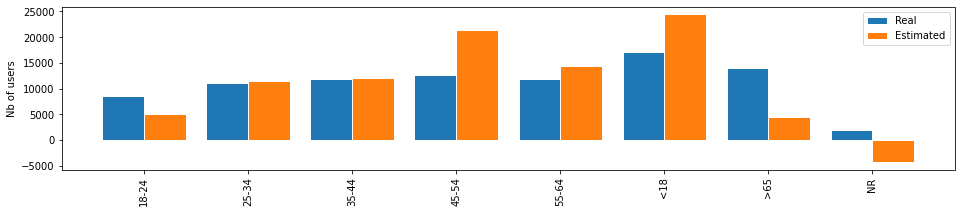

In [145]:
barWidth = 0.4
r1 = np.arange(len(Real[-1]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16,3))
plt.bar(r1, Real[-1], color='tab:blue', width=barWidth, edgecolor='white', label='Real')
plt.bar(r2, estimated, color='tab:orange', width=barWidth, edgecolor='white', label='Estimated')
plt.xticks([r+barWidth/2 for r in r1], Real[0],rotation=90)
plt.ylabel('Nb of users')
plt.legend()
plt.show();

# Visualization real vs estimated (esp = 1)

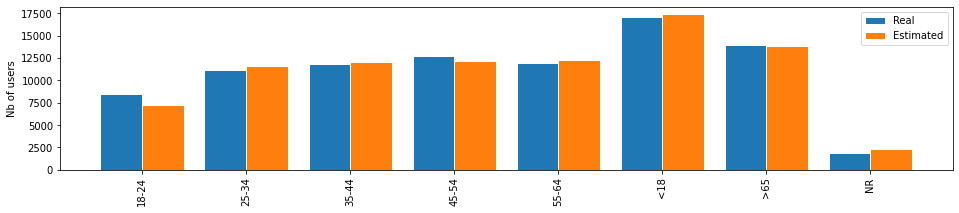

In [146]:
barWidth = 0.4
r1 = np.arange(len(Real[-1]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16,3))
plt.bar(r1, Real[-1], color='tab:blue', width=barWidth, edgecolor='white', label='Real')
plt.bar(r2, estimated1, color='tab:orange', width=barWidth, edgecolor='white', label='Estimated')
plt.xticks([r+barWidth/2 for r in r1], Real[0],rotation=90)
plt.ylabel('Nb of users')
plt.legend()
plt.show();

# Visualization real vs estimated (esp = 10)

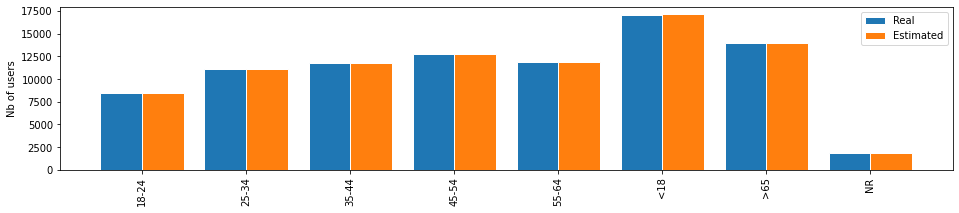

In [147]:
barWidth = 0.4
r1 = np.arange(len(Real[-1]))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(16,3))
plt.bar(r1, Real[-1], color='tab:blue', width=barWidth, edgecolor='white', label='Real')
plt.bar(r2, estimated10, color='tab:orange', width=barWidth, edgecolor='white', label='Estimated')
plt.xticks([r+barWidth/2 for r in r1], Real[0],rotation=90)
plt.ylabel('Nb of users')
plt.legend()
plt.show();

# Calculating error

# esp = 0.1

In [148]:
RMSE = np.sqrt(mean_squared_error(Real[-1],estimated))
print('Nb Real:\t',Real[-1],'\nNb Estimated:\t',estimated)
print('\nRMSE: {} with epsilon: {}'.format(RMSE,eps))
print("Value of p: ", p)
print("Value of q: ", q)

Nb Real:	 [ 8474 11115 11813 12710 11907 17111 13968  1837] 
Nb Estimated:	 [5115, 11434, 12051, 21376, 14440, 24459, 4421, -4363]

RMSE: 5879.36267804598 with epsilon: 0.1
Value of p:  0.13635380786492293
Value of q:  0.12337802744786816


# esp = 1

In [149]:
RMSE = np.sqrt(mean_squared_error(Real[-1],estimated1))
print('Nb Real:\t',Real[-1],'\nNb Estimated:\t',estimated1)
print('\nRMSE: {} with epsilon: {}'.format(RMSE,eps1))
print("Value of p: ", p1)
print("Value of q: ", q1)

Nb Real:	 [ 8474 11115 11813 12710 11907 17111 13968  1837] 
Nb Estimated:	 [7271, 11564, 12096, 12163, 12243, 17361, 13871, 2362]

RMSE: 557.734031595706 with epsilon: 1
Value of p:  0.27970806737656245
Value of q:  0.10289884751763394


# esp = 10

In [150]:
RMSE = np.sqrt(mean_squared_error(Real[-1],estimated10))
print('Nb Real:\t',Real[-1],'\nNb Estimated:\t',estimated10)
print('\nRMSE: {} with epsilon: {}'.format(RMSE,eps10))
print("Value of p: ", p10)
print("Value of q: ", q10)

Nb Real:	 [ 8474 11115 11813 12710 11907 17111 13968  1837] 
Nb Estimated:	 [8473, 11111, 11812, 12710, 11908, 17113, 13970, 1835]

RMSE: 1.9685019685029528 with epsilon: 10
Value of p:  0.9996823014561037
Value of q:  4.538550627089918e-05
